In [48]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.設計一下函數

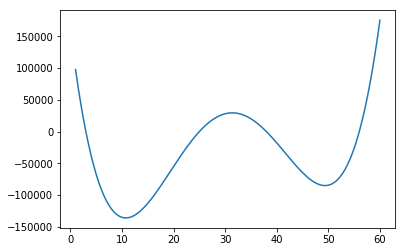

In [186]:
x = np.linspace(1,60,10000)
y = (x-3)*(x-25)*(x-38)*(x-56)
plt.plot(x,y)

## 2.設定startpoint

In [50]:
startpoint = np.random.randint(1,60) ##因為大於60以後y急遽的上升,因此先界定範圍在1~60之間

In [51]:
startpoint

41

## 3.先求導數函數

In [52]:
yprime = 4*x**3-366*x**2+9670*x-66634

## 4.Gradient descent

In [159]:
a = np.array([1,-122,4835,-66634,159600])
p = np.poly1d(a)
p_der = p.deriv()
def GradientDescent(max_iter,start,learning_rate):
    plt.figure(2)
    plt.plot(x,y)
    plt.figure(3)
    plt.xlim(start-15,start+15)
    plt.plot(x,y)
    plt.plot(start,p(start),'bo',color='red')
    for i in range(max_iter):
        start = start - learning_rate*p_der(start)
        plt.figure(3)
        plt.plot(start,p(start),'bo',color='green',markersize=1)
        plt.annotate(str(i+1), (start,p(start) ))
        
        
        
        
        
    
        


        
        
        

## 起始值41 ; learning rate = 0.0005

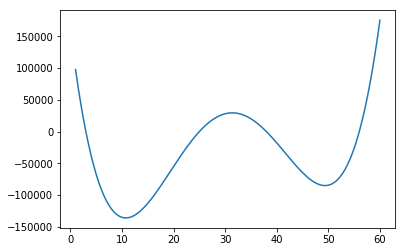

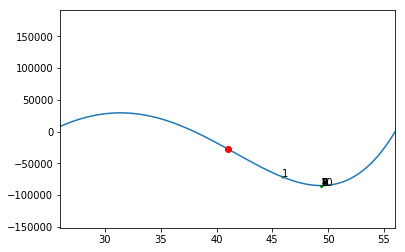

In [160]:
GradientDescent(10,startpoint,0.0005)

## 換個起始值

In [163]:
startpoint = np.random.randint(1,60)

In [164]:
startpoint

5

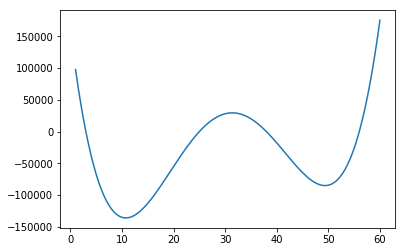

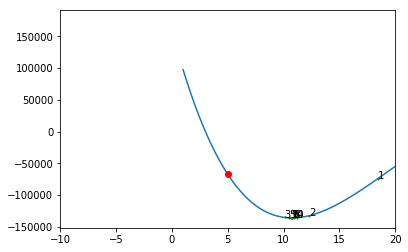

In [165]:
GradientDescent(10,startpoint,0.0005)

## 實驗看看遠一點的起始值

In [170]:
startpoint = 58

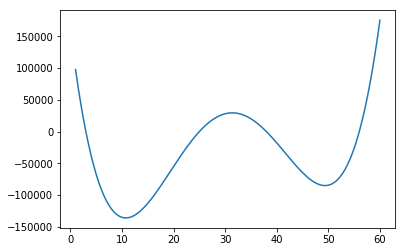

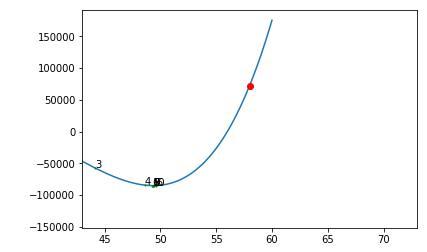

In [171]:
GradientDescent(10,startpoint,0.0005)

## learning rate = 0.0005還真不錯 那這次來看一下實際的x值的收斂情況

In [172]:
result_x = list()
def GradientDescent2(max_iter,start,learning_rate):
    for i in range(max_iter):
        start = start - learning_rate*p_der(start)
        result_x.append(start)
    print(result_x)


In [173]:
startpoint = 60

In [175]:
GradientDescent2(10,startpoint,0.0005)

[30.017, 28.996665857174005, 27.221222030605247, 24.18411052727334, 19.31318650650941, 13.102173221775303, 9.986796237131916, 11.277254364567161, 10.473620077852742, 10.927322823873924]


### 小結: 對這個函數來說，learning rate=0.0005 對於找local minimum這件事很棒，雖然在最後這個情況裡不小心衝過山頭，但還是很快找到了一個local minimum

## 5.來互動式的吧!

In [180]:
from ipywidgets import interact

In [204]:
a = np.array([1,-122,4835,-66634,159600])
p = np.poly1d(a)
p_der = p.deriv()
def GradientDescent3(times,start):
    plt.figure(3)
    plt.plot(x,y)
    plt.plot(start,p(start),'bo',color='red')
    plt.xlim(1,60)
    for i in range(times):
        start = start - 0.0005*p_der(start)
    plt.figure(3)
    plt.plot(start,p(start),'bo',color='green',markersize=8)
    plt.annotate(start, (start,p(start) ))
    
    
    
    

In [206]:
interact(GradientDescent3,start=(0,60),times=(0,100))

interactive(children=(IntSlider(value=50, description='times'), IntSlider(value=30, description='start', max=6…

<function __main__.GradientDescent3(times, start)>